In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd 
import sys 
sys.path.append("/Odyssey/private/t22picar/tools/")
from plot_tools import plot_uv_map,plot_map_zoom,plot_map_multizoom

In [17]:
# Select geostrophy and product 

time_target='2019-11-30'

"""
result_filepath =  f"/Odyssey/private/t22picar/multivar_drifter/rec/duacs_15m_8th/daily/duacs_15m_8th_{time_target}.nc"
duacs = xr.open_dataset(result_filepath)
ec_duacs = duacs.ugos**2 + duacs.vgos**2
"""

result_filepath =  f"/Odyssey/private/t22picar/multivar_drifter/rec/unet_uv_aoml_15m_10y_11d_bathy_no_sst_mae_duacs/daily/unet_rec_{time_target}.nc"
imt = xr.open_dataset(result_filepath)
#imt = imt.interp(lon=ec_duacs.longitude,lat=ec_duacs.latitude,method="linear")
ec_imt = imt.ugos**2 + imt.vgos**2
#res_data = res_data#.sel(lon=slice(-136.1,-109.1)).sel(lat=slice(27.15,48.95))

result_filepath =  f"/Odyssey/private/t22picar/multivar_drifter/rec/globcurrent_15m_4th/daily/unet_rec_{time_target}.nc"
gc = xr.open_dataset(result_filepath)
gc = gc.interp(lon=ec_imt.lon,lat=ec_imt.lat,method="linear")
ec_gc = gc.ugos**2 + gc.vgos**2

result_filepath = "/Odyssey/private/t22picar/data/era5/era5_2010-01-01_2022-01-01_4th.nc"
era5 = xr.open_dataset(result_filepath).sel(time=time_target)

box_cal = [-135, -115, 20, 50]
box_med = [-5.6, 16.8, 34.6, 44.6]
box_gs = [-80, 0, 30, 60 ]
box_agulhas = [0, 60, -50, -30]
box_NA = [-40, 0, 48, 68]

box_mozemb = [30, 54,-35, -6]
box_kuro = [125, 170, 25, 45]

In [7]:
(np.mean(ec_imt) - np.mean(ec_gc)) / np.mean(ec_gc)

<xarray.DataArray ()> Size: 4B
array(0.10742875, dtype=float32)
Coordinates:
    time     datetime64[ns] 8B 2019-11-30

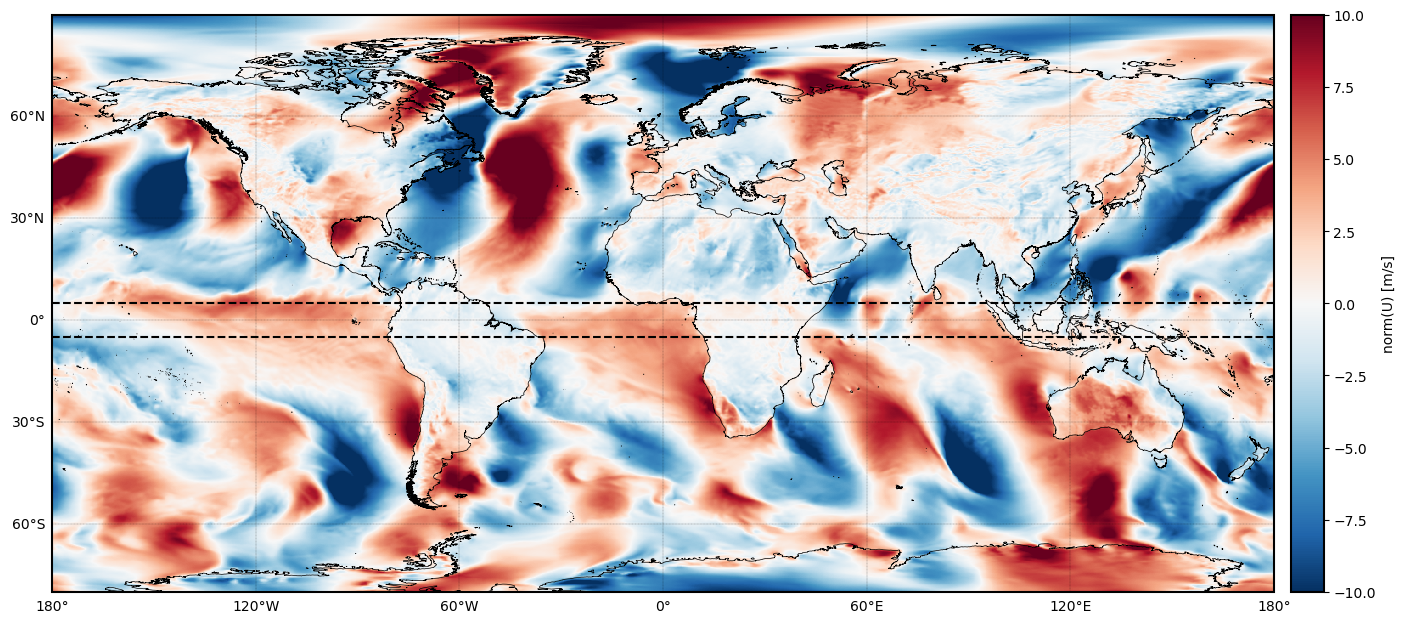

In [8]:
vmax=10
plot_uv_map(era5.v10,era5.lon,era5.lat,lat_mask=5,vmin=-vmax,vmax=vmax)

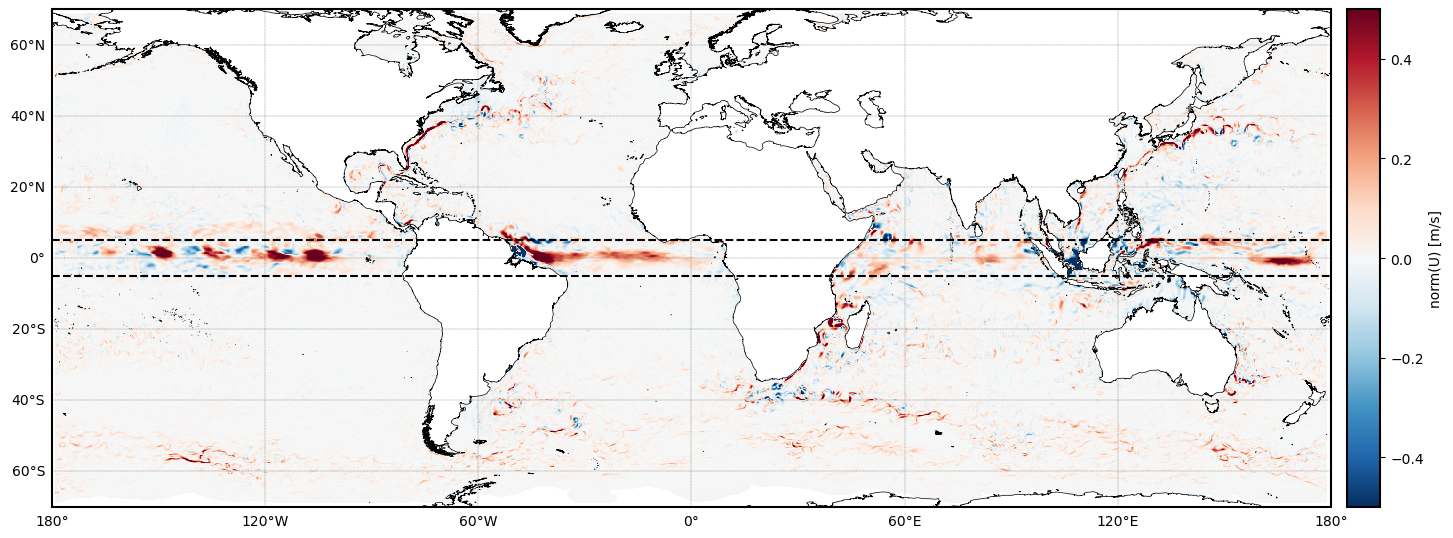

In [9]:
vmax=.5
plot_uv_map(ec_imt-ec_gc,ec_imt.lon,ec_imt.lat,lat_mask=5,vmin=-vmax,vmax=vmax)

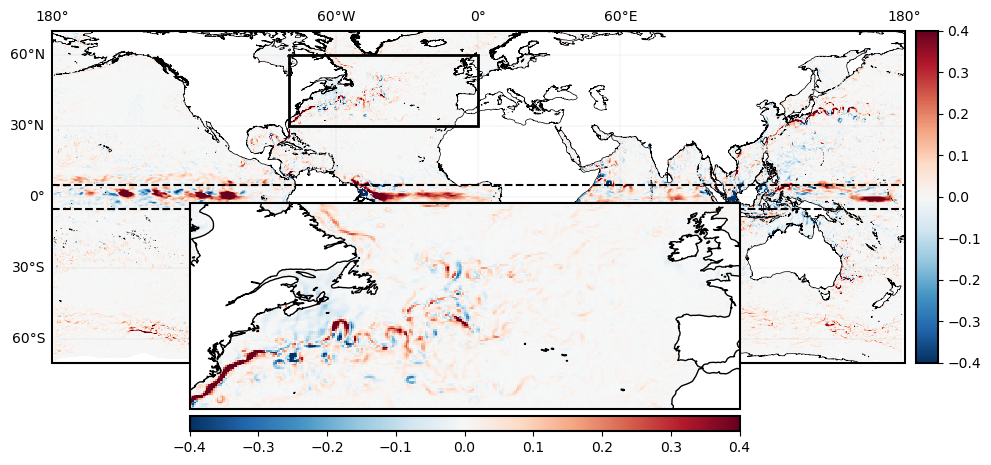

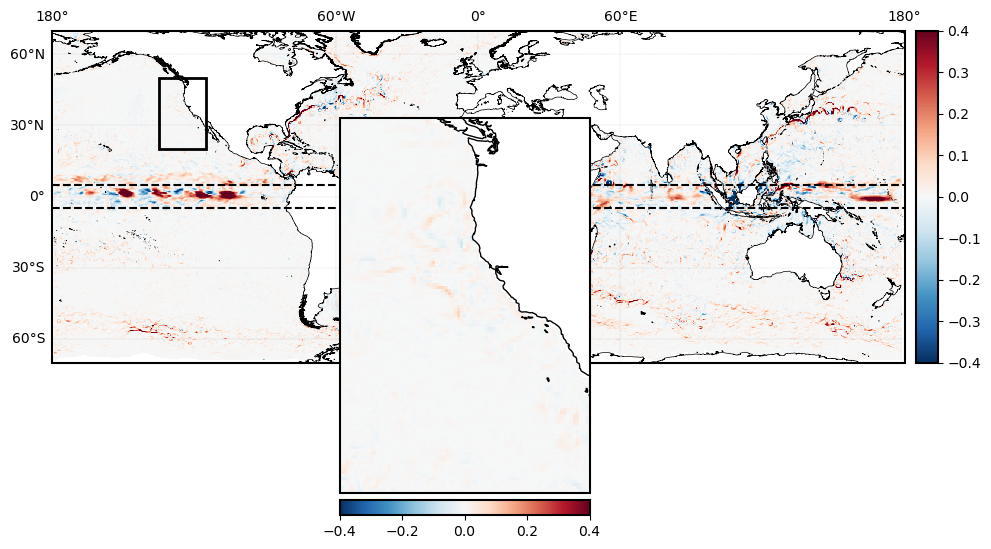

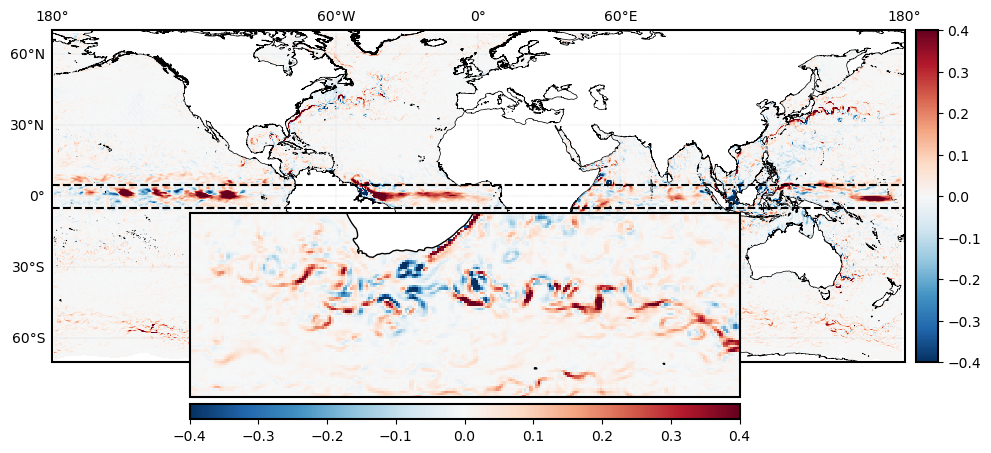

In [10]:
vmax=.4
plot_map_zoom(ec_imt-ec_gc,ec_imt.lon,ec_imt.lat,lat_mask=5,vmin=-vmax,vmax=vmax,zoom_extent=box_gs)
plot_map_zoom(ec_imt-ec_gc,ec_imt.lon,ec_imt.lat,lat_mask=5,vmin=-vmax,vmax=vmax,zoom_extent=box_cal)
plot_map_zoom(ec_imt-ec_gc,ec_imt.lon,ec_imt.lat,lat_mask=5,vmin=-vmax,vmax=vmax,zoom_extent=box_agulhas)
#plot_map_zoom(ec_imt-ec_duacs,ec_imt.lon,ec_imt.lat,lat_mask=5,vmin=-vmax,vmax=vmax,zoom_extent=box_NA)

In [25]:
# Year mean 
from glob import glob 

list_of_maps = sorted(glob("/Odyssey/private/t22picar/multivar_drifter/rec/unet_uv_aoml_15m_10y_11d_bathy_no_sst_mae_duacs_RonanUnet/daily/unet_rec_*.nc"))
imt = xr.open_mfdataset(list_of_maps, combine='nested', concat_dim='time')
ec_imt = imt.ugos**2 + imt.vgos**2

list_of_maps = sorted(glob("/Odyssey/private/t22picar/multivar_drifter/rec/globcurrent_15m_4th/daily/unet_rec_*.nc"))
gc = xr.open_mfdataset(list_of_maps, combine='nested', concat_dim='time')
gc = gc.interp(lon=ec_imt.lon,lat=ec_imt.lat,method="linear")
ec_gc = gc.ugos**2 + gc.vgos**2

list_of_maps = sorted(glob("/Odyssey/private/t22picar/multivar_drifter/rec/duacs_15m_8th/daily/duacs_15m_8th_*.nc"))
duacs = xr.open_mfdataset(list_of_maps, combine='nested', concat_dim='time')
duacs = duacs.rename({"longitude":"lon"})
duacs = duacs.rename({"latitude":"lat"})
duacs = duacs.interp(lon=ec_imt.lon,lat=ec_imt.lat,method="linear")
ec_duacs = duacs.ugos**2 + duacs.vgos**2



GlobCurrent

In [19]:

list_zoom_extent=[box_gs,box_agulhas,box_mozemb,box_kuro]
list_zoom_ax = [[0.1, 0.65, 0.5, 0.5],[0.1, -0.11, 0.5, 0.5],[0.6, -0.11, 0.5, 0.5],[0.6, 0.65, 0.5, 0.5]]

In [15]:
#dec = np.abs(ec_imt-ec_gc)
dec_gc = ec_imt-ec_gc
dec_gc = dec_gc.mean(dim="time").values


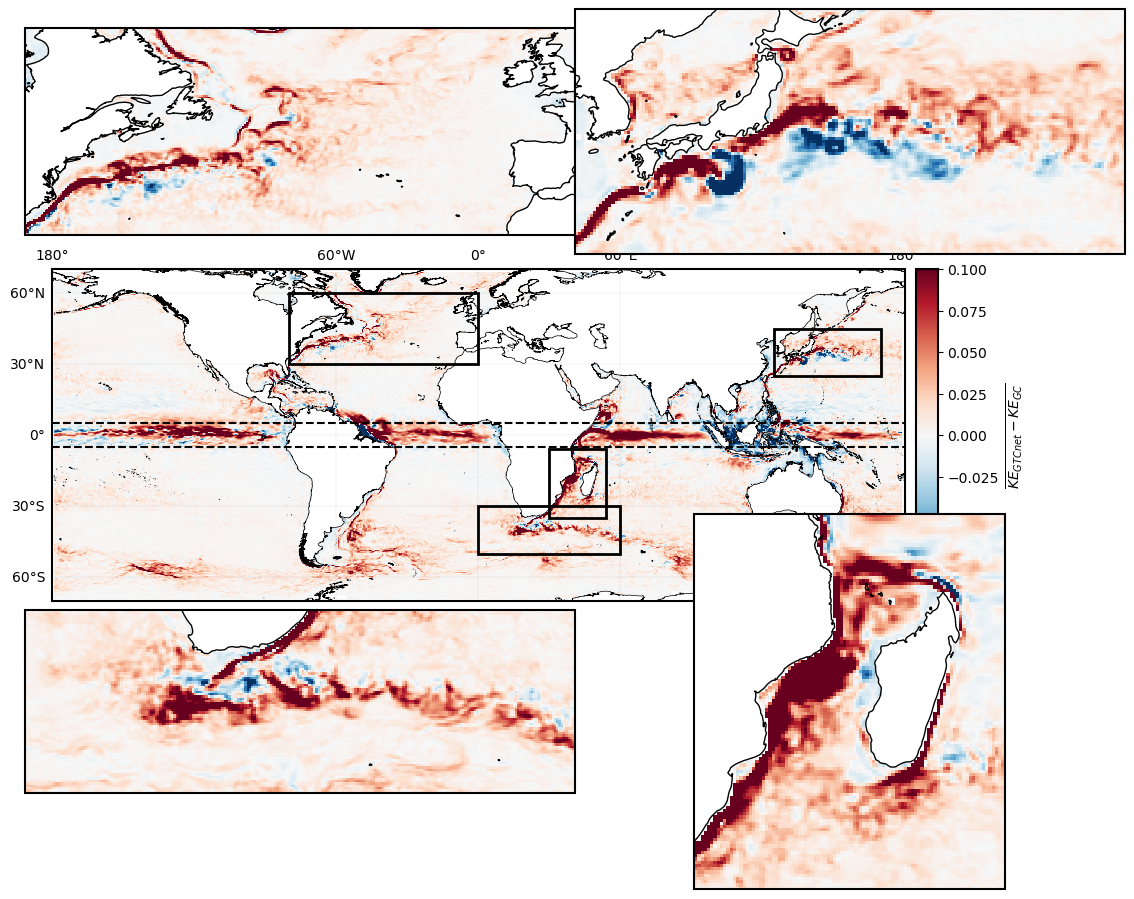

In [22]:
vmax=.1
#plot_uv_map(dec_gc,ec_imt.lon,ec_imt.lat,lat_mask=5,vmin=-vmax,vmax=vmax,title="$\overline{KE_{GTCnet} - KE_{GlobCurrent}}$")
plot_map_multizoom(dec_gc,ec_imt.lon,ec_imt.lat,lat_mask=5,vmin=-vmax,vmax=vmax,colorbar_label="$\overline{KE_{GTCnet} - KE_{GC}}$",list_zoom_ax=list_zoom_ax,list_zoom_extent=list_zoom_extent)

DUACS

In [26]:
# Duacs

dec_duacs = ec_imt-ec_duacs
dec_duacs = dec_duacs.mean(dim="time").values


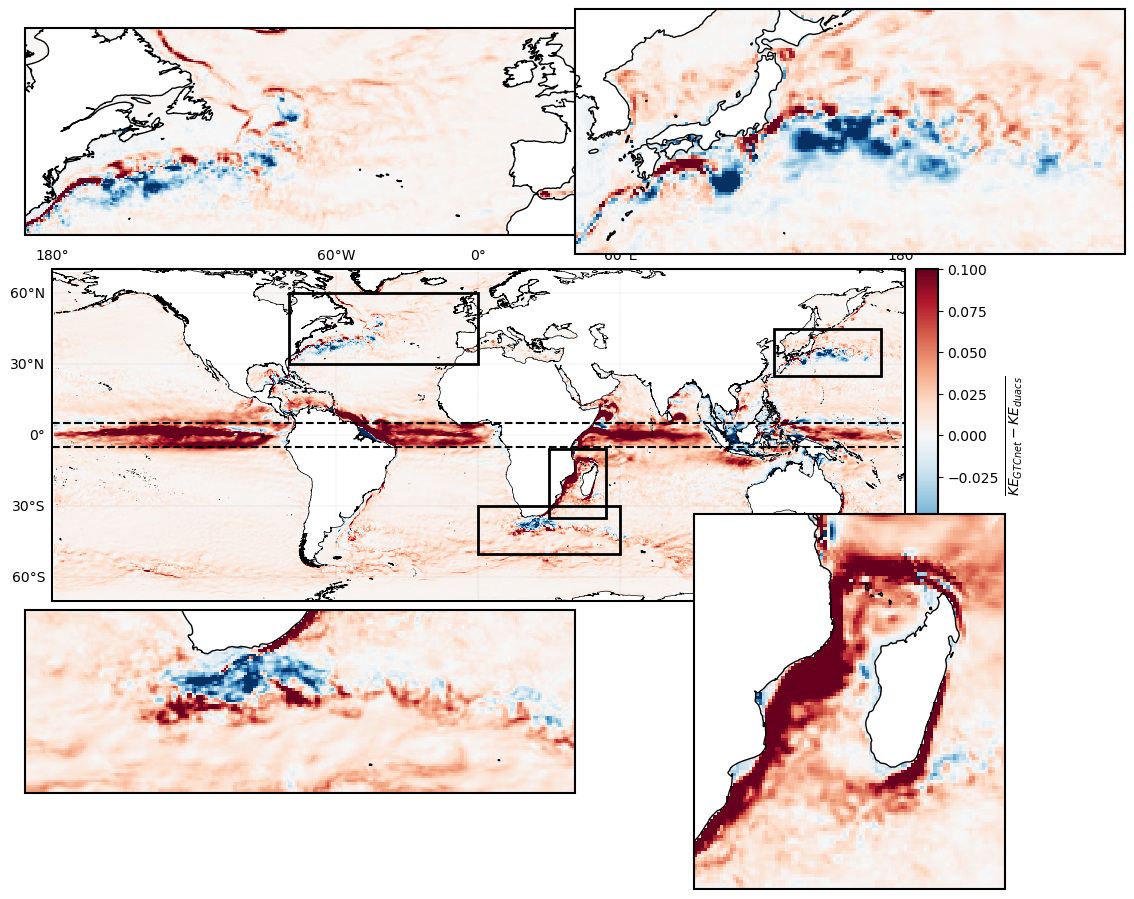

In [27]:
vmax=.1
plot_map_multizoom(dec_duacs,ec_imt.lon,ec_imt.lat,lat_mask=5,vmin=-vmax,vmax=vmax,colorbar_label="$\overline{KE_{GTCnet} - KE_{duacs}}$",list_zoom_ax=list_zoom_ax,list_zoom_extent=list_zoom_extent)

NO WIND

In [126]:
# No wind 
list_of_maps = sorted(glob("/Odyssey/private/t22picar/multivar_drifter/rec/unet_uv_aoml_15m_10y_11d_bathy_no_sst_wind_mae_duacs/daily/unet_rec_*.nc"))
imt_nw = xr.open_mfdataset(list_of_maps, combine='nested', concat_dim='time')
ec_imt_nw = imt_nw.ugos**2 + imt_nw.vgos**2

In [127]:
# Duacs
dec_duacs_nw = ec_imt_nw-ec_duacs
dec_duacs_nw = dec_duacs_nw.mean(dim="time").values

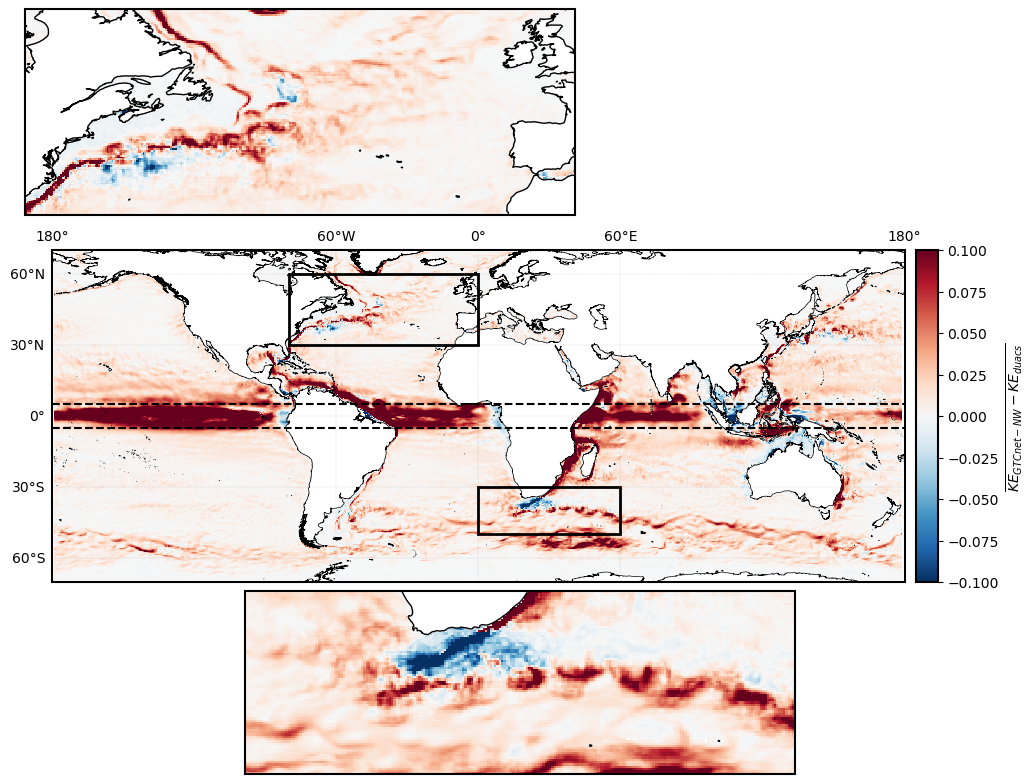

In [128]:
vmax=.1
plot_map_multizoom(dec_duacs_nw,ec_imt.lon,ec_imt.lat,lat_mask=5,vmin=-vmax,vmax=vmax,colorbar_label="$\overline{KE_{GTCnet-NW} - KE_{duacs}}$",list_zoom_ax=list_zoom_ax,list_zoom_extent=list_zoom_extent)

In [ ]:
# NO WIND ? 
dec_imt = ec_imt-ec_imt_nw
dec_imt = dec_imt.mean(dim="time").values

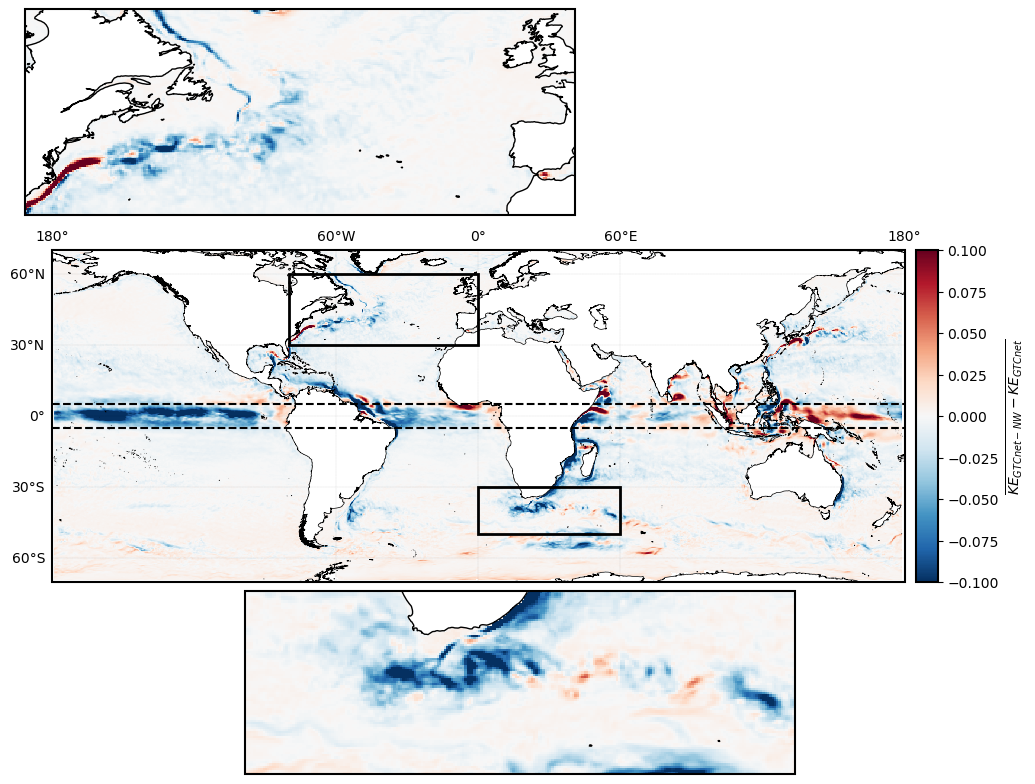

In [132]:
vmax=.1
plot_map_multizoom(dec_imt,ec_imt.lon,ec_imt.lat,lat_mask=5,vmin=-vmax,vmax=vmax,colorbar_label="$\overline{KE_{GTCnet-NW} - KE_{GTCnet}}$",list_zoom_ax=list_zoom_ax,list_zoom_extent=list_zoom_extent)